In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('shampoo.csv')

In [3]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [4]:
df.tail()

,Month,Sales
31,3-08,407.6
32,3-09,682.0
33,3-10,475.3
34,3-11,581.3
35,3-12,646.9


In [5]:
type(df)

pandas.core.frame.DataFrame

# I convert dataframe to series

In [6]:
df=pd.read_csv('shampoo.csv',index_col='Month',squeeze=True)

In [7]:
df.head()

Month
1-01    266.0
1-02    145.9
1-03    183.1
1-04    119.3
1-05    180.3
Name: Sales, dtype: float64

In [8]:
type(df)

pandas.core.series.Series

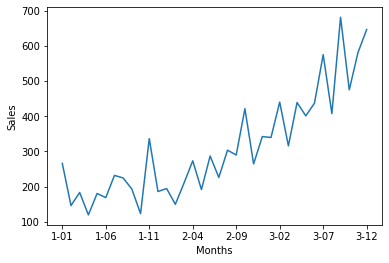

In [9]:
df.plot()
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

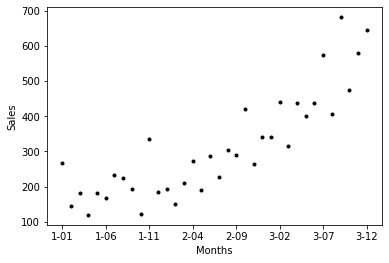

In [10]:
df.plot(style='k .')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

In [11]:
df.size

36

In [12]:
df.describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales, dtype: float64

In [13]:
# Now Moving Average
df_ma=df.rolling(window=7).mean()

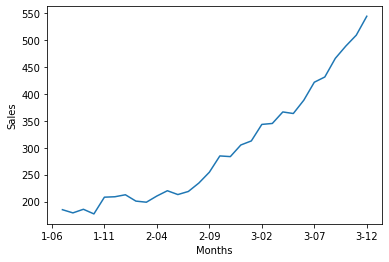

In [14]:
df_ma.plot()
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

In [15]:
df

Month
1-01    266.0
1-02    145.9
1-03    183.1
1-04    119.3
1-05    180.3
1-06    168.5
1-07    231.8
1-08    224.5
1-09    192.8
1-10    122.9
1-11    336.5
1-12    185.9
2-01    194.3
2-02    149.5
2-03    210.1
2-04    273.3
2-05    191.4
2-06    287.0
2-07    226.0
2-08    303.6
2-09    289.9
2-10    421.6
2-11    264.5
2-12    342.3
3-01    339.7
3-02    440.4
3-03    315.9
3-04    439.3
3-05    401.3
3-06    437.4
3-07    575.5
3-08    407.6
3-09    682.0
3-10    475.3
3-11    581.3
3-12    646.9
Name: Sales, dtype: float64

In [16]:
df_base=pd.concat([df,df.shift(1)],axis=1) # Now Create a base line model this is also called naive model

In [17]:
df_base

,Sales,Sales
Month,,
1-01,266.0,NaN
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3
1-06,168.5,180.3
1-07,231.8,168.5
1-08,224.5,231.8
1-09,192.8,224.5


In [18]:
df_base.columns=['Actual_Sales','Forcast_Sale']

In [19]:
df_base.head()

,Actual_Sales,Forcast_Sale
Month,,
1-01,266.0,NaN
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3


In [20]:
# dorp nan value
df_base.dropna(inplace=True)

In [21]:
df_base.head()

,Actual_Sales,Forcast_Sale
Month,,
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3
1-06,168.5,180.3


In [22]:
# Now means squard error
from sklearn.metrics import mean_squared_error

In [23]:
df_error=mean_squared_error(df_base.Actual_Sales,df_base.Forcast_Sale)

In [24]:
df_error

11715.388285714285

In [25]:
df_error_sqrt=np.sqrt(df_error)

In [26]:
df_error_sqrt

108.23764726616282

# Now used Arima model

ARIMA(p,d,q)

In [27]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

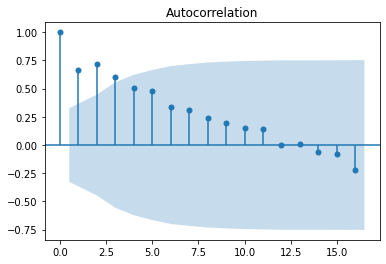

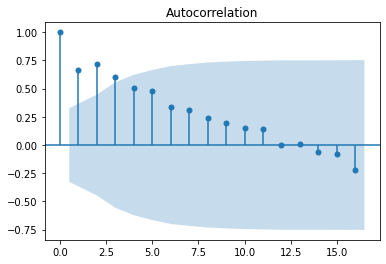

In [28]:
plot_acf(df)

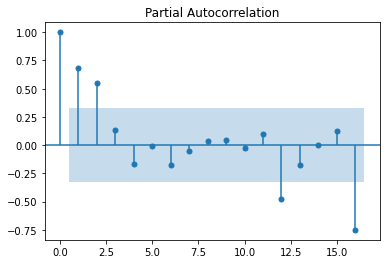

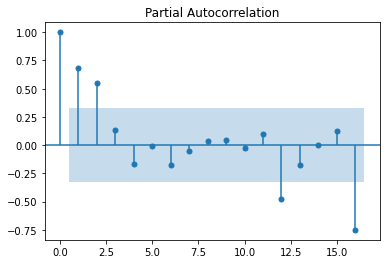

In [29]:
# Q-3 , p-2 , d-0-2
plot_pacf(df)

In [30]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [31]:
df_train=df[0:27]
df_test=df[27:36]

In [32]:
df_model=ARIMA(df_train,order=(2,1,3))

In [33]:
df_model_fit=df_model.fit()

In [34]:
df_model_fit.aic

302.7812310498125

In [35]:
df_forcast=df_model_fit.forecast(steps=9)[0]

In [36]:
np.sqrt(mean_squared_error(df_test,df_forcast))

138.15679212451153

In [37]:
p_values=range(0,6)
q_values=range(0,3)
d_values=range(0,6)

In [38]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order=(p,d,q)
            
            train,test=df[0:26],df[26:36]
            predictions=list()
            
            for i in range(len(test)):
                try:
                    model=ARIMA(train,order)
                    model_fit=model.fit(disp=0)
                    y_pred=model_fit.forecast()[0]
                    
                    predictions.append(y_pred)
                    
                    error=mean_squared_error(test,predictions)
                    
                    print('ARIMA%s MSE = %.2f'% (order,error))
                except:
                    continue

ARIMA(0, 0, 0) MSE = 77386.52
ARIMA(0, 0, 1) MSE = 58506.41
ARIMA(0, 0, 2) MSE = 37782.54
ARIMA(0, 1, 0) MSE = 15114.52
ARIMA(0, 1, 1) MSE = 36107.92
ARIMA(0, 1, 2) MSE = 33731.10
ARIMA(0, 2, 0) MSE = 15647.25
ARIMA(0, 2, 1) MSE = 13242.87
ARIMA(0, 2, 2) MSE = 20549.31
ARIMA(1, 0, 0) MSE = 39759.04
ARIMA(1, 0, 1) MSE = 33701.57
ARIMA(1, 0, 2) MSE = 55565.63
ARIMA(1, 1, 0) MSE = 24996.49
ARIMA(1, 1, 1) MSE = 43122.91
ARIMA(1, 1, 2) MSE = 40352.09
ARIMA(1, 2, 0) MSE = 13572.93
ARIMA(1, 2, 1) MSE = 19249.59
ARIMA(1, 2, 2) MSE = 25872.07
ARIMA(2, 0, 0) MSE = 35545.89
ARIMA(2, 0, 1) MSE = 38080.46
ARIMA(2, 1, 0) MSE = 26641.96
ARIMA(2, 1, 1) MSE = 38483.26
ARIMA(2, 2, 0) MSE = 13549.93
ARIMA(2, 2, 1) MSE = 20185.37
ARIMA(3, 0, 0) MSE = 35669.86
ARIMA(3, 1, 0) MSE = 38986.29
ARIMA(3, 1, 1) MSE = 36499.22
ARIMA(3, 1, 2) MSE = 31364.83
ARIMA(3, 2, 0) MSE = 28375.29
ARIMA(3, 2, 1) MSE = 28903.81
ARIMA(3, 2, 2) MSE = 30733.29
ARIMA(4, 0, 0) MSE = 44899.63
ARIMA(4, 0, 1) MSE = 41325.43
ARIMA(4, 1

In [40]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order=(p,d,q)
            
            train,test=df[0:27],df[27:36]
            predictions=list()
            
            for i in range(len(test)):
                try:
                    model=ARIMA(train,order)
                    model_fit=model.fit(disp=0)
                    y_pred=model_fit.forecast()[0]
                    
                    predictions.append(y_pred)
                    
                    error=mean_squared_error(test,predictions)
                    
                    print('ARIMA%s MSE = %.2f'% (order,error))
                    print("SR-MSE : {f}",np.sqrt(mean_squared_error(test,predictions)))
                    print('\n\n')
                except:
                    continue

ARIMA(0, 0, 0) MSE = 83882.78
SR-MSE : {f} 289.6252375815514



ARIMA(0, 0, 1) MSE = 79922.84
SR-MSE : {f} 282.70628553784076



ARIMA(0, 0, 2) MSE = 60241.08
SR-MSE : {f} 245.44058022902405



ARIMA(0, 1, 0) MSE = 49514.47
SR-MSE : {f} 222.51847255055648



ARIMA(0, 1, 1) MSE = 37271.65
SR-MSE : {f} 193.05865992635927



ARIMA(0, 1, 2) MSE = 24963.08
SR-MSE : {f} 157.9971026266251



ARIMA(0, 2, 0) MSE = 115791.45
SR-MSE : {f} 340.2814238544979



ARIMA(0, 2, 1) MSE = 43058.28
SR-MSE : {f} 207.50488615114517



ARIMA(0, 2, 2) MSE = 18640.48
SR-MSE : {f} 136.53015845542595



ARIMA(1, 0, 0) MSE = 67903.68
SR-MSE : {f} 260.5833548510782



ARIMA(1, 0, 1) MSE = 44285.40
SR-MSE : {f} 210.44095738639268



ARIMA(1, 0, 2) MSE = 32573.63
SR-MSE : {f} 180.4816587613086



ARIMA(1, 1, 0) MSE = 20717.21
SR-MSE : {f} 143.93473121274138



ARIMA(1, 1, 1) MSE = 34686.26
SR-MSE : {f} 186.24247275439336



ARIMA(1, 1, 2) MSE = 23959.31
SR-MSE : {f} 154.78795647320737



ARIMA(1, 2, 0) MSE = 29531.24